<a href="https://colab.research.google.com/github/suryapratapkhuntia/Machine-Learning-End_to_end_project/blob/main/ridge_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
x=data.data
y=data.target

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [9]:
model.fit(x_train,y_train)


LinearRegression()

In [12]:
model.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [13]:
model.intercept_

np.float64(151.88331005254167)

In [14]:
y_pred=model.predict(x_test)

In [18]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.4399338661568968

In [19]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(55.627840795469155)

In [24]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [25]:
print(ridge.coef_)
print(ridge.intercept_)

[  42.24252786  -57.30448273  282.1721254   198.0593951    14.36373444
  -22.55107873 -136.92968398  102.02306937  260.10429387   98.55269201]
151.75788541423188


In [26]:
y_pred1=ridge.predict(x_test)

In [27]:
print(r2_score(y_test,y_pred1))
print(np.sqrt(mean_squared_error(y_test,y_pred1)))

0.4078252224517157
57.20019371687056


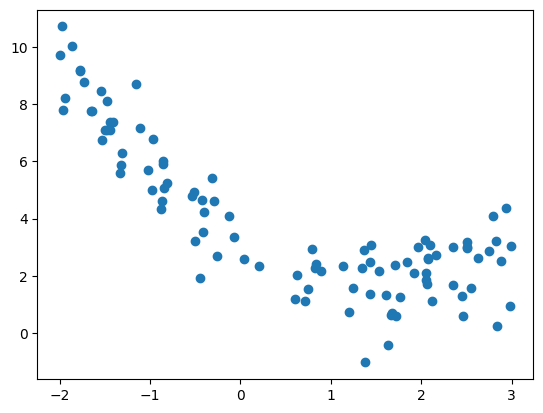

In [30]:
m=100
x1=5*np.random.rand(m,1) - 2
x2=0.7 * x1 ** 2 -2 * x1 +3 + np.random.randn(m,1)
plt.scatter(x1,x2)
plt.show()

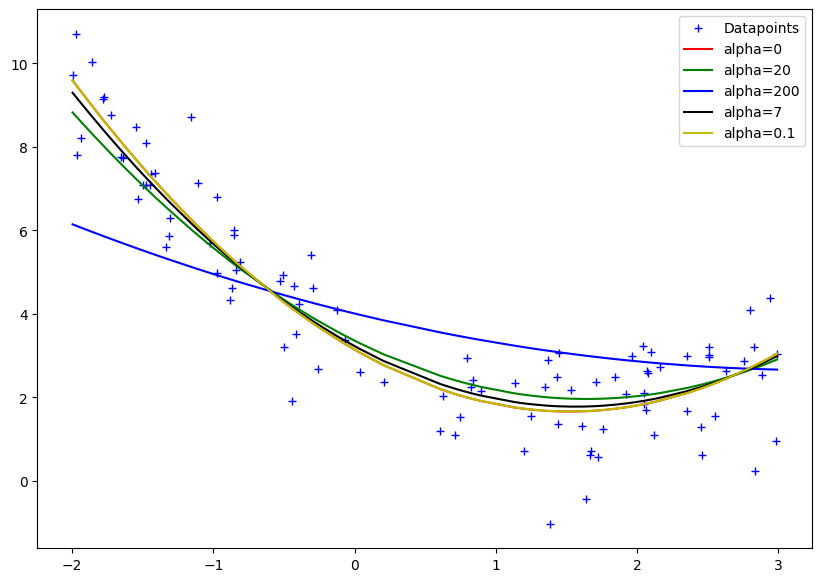

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
def get_pred_ridge(x1,x2,degree,alpha):
    poly_reg=Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('reg',Ridge(alpha=alpha))
    ])
    poly_reg.fit(x1,x2)
    return poly_reg.predict(x1)
alphas=[0,20,200,7,0.10]
cs=['r','g','b','k','y']

plt.figure(figsize=(10,7))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha,c in zip(alphas,cs):
    y_pred=get_pred_ridge(x1,x2,degree=2,alpha=alpha)
    plt.plot(sorted(x1[:,0]),y_pred[np.argsort(x1[:,0])],c,label=f'alpha={alpha}'.format(alpha))
plt.legend()
plt.show()